In [250]:
%load_ext autoreload
%autoreload 2

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 306 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [251]:
import numpy as np
import json
from random import sample

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [252]:
import torch
import torch.nn.functional as F

from transformers import *

In [253]:
models = {}

In [254]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-base', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In cached_path: url_or_filename = https://huggingface.co/roberta-base/resolve/main/config.json
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b
In cached_path: url_or_filename = https://huggingface.co/roberta-base/resolve/main/pytorch_model.bin
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7
In cached_path: url_or_filename = https://huggingface.co/roberta-base/resolve/main/vocab.json
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
In cached_path: url_or_filename = https://huggingface.co/roberta-base/resolve/main/merges.txt
In cached_pat

In [256]:
model_class, tokenizer_class, shortcut, mask_token = RobertaForMaskedLM, RobertaTokenizer, 'roberta-large', '<mask>'
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In cached_path: url_or_filename = https://huggingface.co/roberta-large/resolve/main/config.json
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/dea67b44b38d504f2523f3ddb6acb601b23d67bee52c942da336fa1283100990.94cae8b3a8dbab1d59b9d4827f7ce79e73124efa6bb970412cd503383a95f373
In cached_path: url_or_filename = https://huggingface.co/roberta-large/resolve/main/pytorch_model.bin
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/8e36ec2f5052bec1e79e139b84c2c3089cb647694ba0f4f634fec7b8258f7c89.c43841d8c5cd23c435408295164cda9525270aa42cd0cc9200911570c0342352
In cached_path: url_or_filename = https://huggingface.co/roberta-large/resolve/main/vocab.json
In cached_path: output_path = /home/xd/.cache/huggingface/transformers/7c1ba2435b05451bc3b4da073c8dec9630b22024a65f6c41053caccf2880eb8f.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab
In cached_path: url_or_filename = https://huggingface.co/roberta-large/resolve/main/merges.txt
In cached

In [ ]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In cached_path: url_or_filename = https://huggingface.co/gpt2/resolve/main/config.json



In cached_path: output_path = /home/xd/.cache/huggingface/transformers/fc674cd6907b4c9e933cb42d67662436b89fa9540a1f40d7c919d0109289ad01.7d2e0efa5ca20cef4fb199382111e9d3ad96fd77b849e1d4bed13a66e1336f51
In cached_path: url_or_filename = https://huggingface.co/gpt2/resolve/main/pytorch_model.bin


In [ ]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-large', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [ ]:
model_class, tokenizer_class, shortcut, mask_token = GPT2LMHeadModel, GPT2Tokenizer, 'gpt2-xl', None
model, tokenizer = model_class.from_pretrained(shortcut), tokenizer_class.from_pretrained(shortcut)
models[shortcut] = (model, tokenizer, mask_token)

In [257]:
model, tokenizer, mask_token = models['roberta-large']

In [258]:
import re
import pandas as pd
import collections
import os
import nltk
import random

In [10]:
# 处理属性词典->attri_dict
# bless

# DiffVec
filename = 'sim_eval_bless.csv'
file_colname=['word1','word2','relation']
df = pd.read_csv(filename,header=None,names=file_colname,sep=';')
df_clean = df[df['relation'].str.contains('attri')]
attri_data = df_clean.groupby(['word1'])['word2'].apply(list).to_dict()
print(attri_data)


{'acacia': ['brown', 'green', 'large', 'odorous', 'old', 'tall', 'thorny', 'yellow', 'young'], 'alligator': ['aggressive', 'aquatic', 'big', 'carnivorous', 'dangerous', 'ferocious', 'frightening', 'green', 'heavy', 'hungry', 'large', 'long', 'old', 'scary', 'wild', 'young'], 'ambulance': ['clean', 'dirty', 'dusty', 'empty', 'fast', 'full', 'loud', 'new', 'noisy', 'old', 'white'], 'ant': ['black', 'hard-working', 'industrious', 'red', 'small', 'social', 'strong', 'tiny'], 'apple': ['crunchy', 'delicious', 'edible', 'fresh', 'green', 'healthy', 'juicy', 'nutritious', 'red', 'ripe', 'rotten', 'round', 'sour', 'sweet', 'tasty', 'unripe', 'yellow'], 'apricot': ['delicious', 'edible', 'fresh', 'juicy', 'orange', 'ripe', 'rotten', 'round', 'small', 'sweet', 'tasty', 'unripe'], 'axe': ['big', 'dangerous', 'good', 'heavy', 'long', 'new', 'noisy', 'old', 'powerful', 'rusty', 'sharp', 'short', 'small', 'strong', 'useful'], 'bag': ['big', 'breakable', 'brown', 'capacious', 'clean', 'colorful', 'co

In [59]:
# 把dict的词替换到句子模板
templates = [
    'As we all know , * _ is * = .',
    'The attribute of * _ is * = .',
    '* _ has many attribute such as * = .',
    'When I think of * _ , I think it is * = .',
    'When it comes to * _ , I think of it as * = .'
]
texts = []
one = templates[4]
for (key,value) in attri_data.items():
    for word in value:
        example = one.replace('_', key).replace('=', word)
        texts.append(example)
print(len(texts)) 

2786


In [34]:
outputs = model(input_ids, output_attentions=True)

In [42]:
outputs.logits
outputs.attentions

torch.Size([1, 22, 50265])

In [43]:
# 得到attention值

texts = { 'As we all know , * gun is * dangerous .',
        'As we all know , * cottage is * old .',
        'As we all know , * hotel is * luxurious .',
        'As we all know , * pigeon is * gray .',
        'As we all know , * stove is * electric .',
        'As we all know , * hat is * colorful .',
    'The attribute of * gun is * dangerous .',
       'The attribute of * cottage is * old .',
       'The attribute of * hotel is * luxurious .',
       'The attribute of * pigeon is * gray .',
       'The attribute of * stove is * electric .',
       'The attribute of * hat is * colorful .',}
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in tqdm(texts):
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        #print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    #print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions
        probs = F.softmax(logits, dim=-1)

    attn_scores, attn_probs = zip(*attns)
    attn_scores, attn_probs = torch.cat(attn_scores, dim=0), torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    #print("===============================")
   # print(tokenses)
    #print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求注意力值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
   # 记录总共有多少句子来求平均
    i = i+1
#sum = attn_sum.tolist()
#求平均
attn_average = attn_sum/i
average = attn_average.tolist()
#print(average)

  0%|          | 0/12 [00:00<?, ?it/s]


ValueError: not enough values to unpack (expected 2, got 1)

Text(0.5, 33.0, 'Average-attri-head')

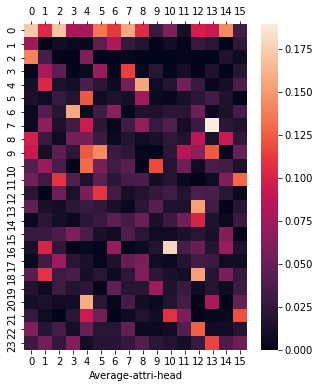

In [17]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-attri-head')

<AxesSubplot:>

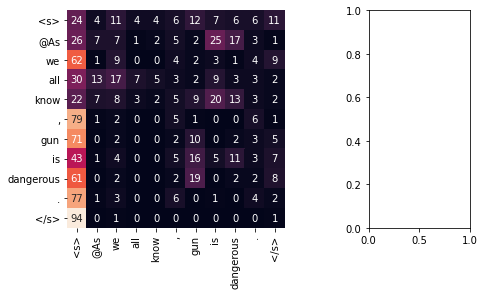

In [125]:
i = 2
layer, head = 16, 10
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)
 

In [327]:
# 初始化样本和标签
image = []
label = []

In [335]:
# +1
# 句子模板
num_model1 = ['In the crowd, the number of children is * _ , and the number of old people is * =.',
             'My game level has been upgraded from level * _ to level * =.',
             '* _ is smaller than * =.',
             'There are * _ deer and * = sheep in the zoo.',
             '* _ plus one is * =.',
             'I have * _ pairs of trousers and * = pieces of clothes.']

texts1 = []
pairs = []
 # 生成0-9的相邻数字组
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#nums = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(9):
    num_pair = [nums[i], nums[i+1]]
    pairs.append(num_pair)
    #print(i)

# num_model1词替换，每个模板生成8个句子，0-47
for text in num_model1:
    for idx in pairs:
        example = text.replace('_', idx[0]).replace('=', idx[1])
        texts1.append(example)
    #print(len(texts1))

In [336]:
# 初始化样本和标签
image = []
label = []
# 算head注意力值
# 选取样例范围
texts = texts1#[45:54]#[9:18] 
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions    
        probs = F.softmax(logits, dim=-1)

    attn_probs = attns
    attn_probs = torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)


# 求head对于特定词对的attention值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
    i = i+1
    # 将attn_average转换为一维向量
    temp = attn_every.flatten()
    # 将向量加入样本集合
    image.append(temp)
    # 同步设置标签,样本对应的类别
    label.append(0)
#求平均权重
attn_average = attn_sum/i 
average = attn_average.tolist()


Ġ0 Ġ1
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '0', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '1', '@.', '</s>']
Ġ1 Ġ2
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '1', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '2', '@.', '</s>']
Ġ2 Ġ3
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '2', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '3', '@.', '</s>']
Ġ3 Ġ4
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '3', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '4', '@.', '</s>']
Ġ4 Ġ5
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '4', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '5', '@.', '</s>']
Ġ5 Ġ6
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '5', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '6', '@.', '</s>']
Ġ6 Ġ

In [202]:
type(input_ids)
#outputs
#print(len(outputs.attentions))
#logits
model

['* _ is uppercase of * =.']

Text(0.5, 33.0, 'Average-+1-head')

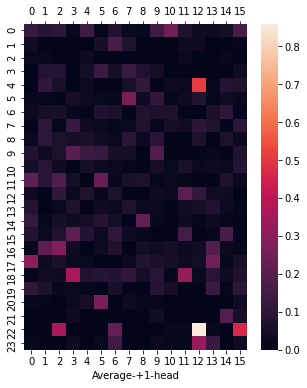

In [152]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-+1-head')

<AxesSubplot:>

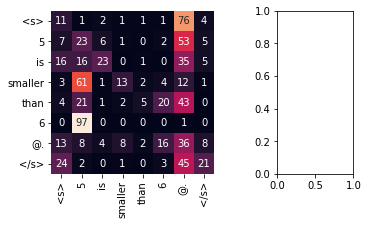

In [145]:
i = 5
layer, head = 22, 12
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)
 

In [337]:
# -1
num_model2 = ['In the crowd, the number of children is * _ , and the number of old people is * =.',
             'My game level has been upgraded from level * _ to level * =.',
             '* _ is smaller than * =.',
             'There are * _ deer and * = sheep in the zoo.',
             'There are * _ questions in the book, * = of which I have learned.',
             'I have * _ pairs of trousers and * = pieces of clothes.'] # -1
texts2 = []
pairs2 = []

# 生成逆相邻
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(9):
    num_pair = [nums[i+1], nums[i]]
    pairs2.append(num_pair)

# num_model2词替换，每个模板生成8个句子，0-47    
for text in num_model2:
    for idx in pairs2:
        example = text.replace('_', idx[0]).replace('=', idx[1])
        texts2.append(example)

# 算head注意力值
# 选取样例范围
texts = texts2#[9: 18] 
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions
        probs = F.softmax(logits, dim=-1)

#     attn_scores, attn_probs = zip(*attns)
    attn_probs = attns
#     attn_scores = torch.cat(attn_scores, dim=0), 
    attn_probs = torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    print("===============================")
   # print(tokenses)
    print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求head对于特定词对的attention值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
   # 记录总共有多少句子来求平均
    i = i+1
    # 将attn_average转换为一维向量
    temp = attn_every.flatten()
    # 将向量加入样本集合
    image.append(temp)
    # 同步设置标签,样本对应的类别
    label.append(1)
#求平均
attn_average = attn_sum/i 
#print(attn_average)
average = attn_average.tolist()

Ġ1 Ġ0
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '1', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '0', '@.', '</s>']
[(10, 19)]
Ġ2 Ġ1
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '2', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '1', '@.', '</s>']
[(10, 19), (10, 19)]
Ġ3 Ġ2
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '3', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '2', '@.', '</s>']
[(10, 19), (10, 19), (10, 19)]
Ġ4 Ġ3
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '4', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '3', '@.', '</s>']
[(10, 19), (10, 19), (10, 19), (10, 19)]
Ġ5 Ġ4
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '5', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', '4', '@.', '</s>']
[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19)]
Ġ6 Ġ5
['<s>', '

[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (3, 6), (3, 6), (3, 6)]
Ġ4 Ġ3
['<s>', '@There', 'are', '4', 'deer', 'and', '3', 'sheep', 'in', 'the', 'zoo', '@.', '</s>']
[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (3, 6), (3, 6), (3, 6), (3, 6)]
Ġ5 Ġ4
['<s>', '@There', 'are', '5', 'deer', 'and', '4', 'sheep', 'in', 'the', 'zoo', '@.', '</s>']
[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (3, 6), (3, 6)

[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 8), (3, 8), (3, 8)]
Ġ4 Ġ3
['<s>', '@I', 'have', '4', 'pairs', 'of', 'trousers', 'and', '3', 'pieces', 'of', 'clothes', '@.', '</s>']
[(10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (10, 19), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (9, 12), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (1, 5), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 6), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 9), (3, 8), (3, 8), (3, 8), (3, 8)]
Ġ5 Ġ4
['<s>', '@I', 'have', '5', 'pairs', 'of', 'trouse

Text(0.5, 33.0, 'Average--1-head')

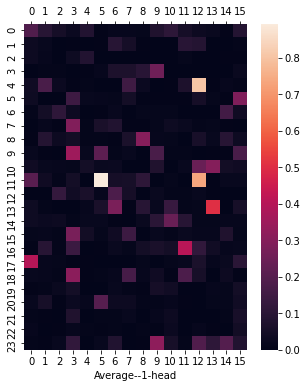

In [274]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average--1-head')

<AxesSubplot:>

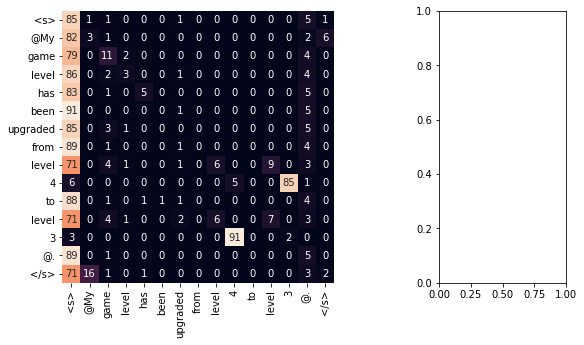

In [275]:
i = 3
layer, head = 4, 12
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)

In [338]:
# =
num_model3 = ['In the crowd, the number of children is * _ , and the number of old people is also * _.',
             'This game needs * _ Chinese and * _ Swiss to form a team.',
             'Each topic has * _ options and * _ corresponding positions.',
             'There are * _ deer and * _ sheep in the zoo.',
             'I have * _ pairs of trousers and * _ pieces of clothes.'] # =
texts3 = []
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# num_model3词替换
#for text in num_model3:
#    text3 = []
 #   for num in nums:
 #       example = text.replace('_', num)
  #      text3.append(example)
   # texts3.appeng(text3)
# 或,每个数字有是个句子
for text in num_model3:
    for num in nums:
        example = text.replace('_', num)
        texts3.append(example)
print(len(texts3))
# 算head注意力值
# 选取样例范围
texts = texts3#[:45] 
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions
        probs = F.softmax(logits, dim=-1)

#     attn_scores, attn_probs = zip(*attns)
    attn_probs = attns
#     attn_scores = torch.cat(attn_scores, dim=0), 
    attn_probs = torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    print("===============================")
   # print(tokenses)
   # print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求head对于特定词对的attention值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
   # 记录总共有多少句子来求平均
    i = i+1
     # 将attn_average转换为一维向量
    temp = attn_every.flatten()
    # 将向量加入样本集合
    image.append(temp)
    # 同步设置标签,样本对应的类别
    label.append(2)

print(len(image),len(label))
print(label[-1])
#求平均
attn_average = attn_sum/i 
average = attn_average.tolist()

50
Ġ0 Ġ0
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '0', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', 'also', '0', '@.', '</s>']
Ġ1 Ġ1
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '1', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', 'also', '1', '@.', '</s>']
Ġ2 Ġ2
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '2', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', 'also', '2', '@.', '</s>']
Ġ3 Ġ3
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '3', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', 'also', '3', '@.', '</s>']
Ġ4 Ġ4
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '4', ',', 'and', 'the', 'number', 'of', 'old', 'people', 'is', 'also', '4', '@.', '</s>']
Ġ5 Ġ5
['<s>', '@In', 'the', 'crowd', '@,', 'the', 'number', 'of', 'children', 'is', '5', ',', 'and', 'the', 'number', 'of', 'ol

Text(0.5, 33.0, 'Average-=-head')

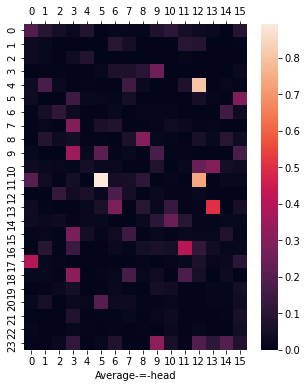

In [225]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-=-head')

In [ ]:
i = 2
layer, head = 16, 10
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)

In [339]:
# 字母
a = ["* _ is uppercase of * =."]
#b = ["* _ is not * =."]
# 生成大小写字母
list_upper = [chr(ord('A')+x) for x in range(26)]
list_l = [chr(ord('a')+x) for x in range(26)]
pairs = []
texts = []
# 词对
for i in range(25):
    pair = [list_upper[i+1], list_upper[i]]
    pairs.append(pair)
#print(pairs)
# 替换
for text in a:
    for idx in pairs:
        example = text.replace('_', idx[0]).replace('=', idx[1])
        texts.append(example)
        
# 算head注意力值
# 选取样例范围
texts = texts#[-6: ] 
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions
        probs = F.softmax(logits, dim=-1)

#     attn_scores, attn_probs = zip(*attns)
    attn_probs = attns
#     attn_scores = torch.cat(attn_scores, dim=0), 
    attn_probs = torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    #print("===============================")
   # print(tokenses)
    #print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求head对于特定词对的attention值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
   # 记录总共有多少句子来求平均
    i = i+1
         # 将attn_average转换为一维向量
    temp = attn_every.flatten()
    # 将向量加入样本集合
    image.append(temp)
    # 同步设置标签,样本对应的类别
    label.append(3)

print(len(image),len(label))
print(label[-1])
#求平均
attn_average = attn_sum/i 
average = attn_average.tolist()

ĠB ĠA
['<s>', 'B', 'is', 'u', '@pperc', '@ase', 'of', 'A', '@.', '</s>']
ĠC ĠB
['<s>', 'C', 'is', 'u', '@pperc', '@ase', 'of', 'B', '@.', '</s>']
ĠD ĠC
['<s>', 'D', 'is', 'u', '@pperc', '@ase', 'of', 'C', '@.', '</s>']
ĠE ĠD
['<s>', 'E', 'is', 'u', '@pperc', '@ase', 'of', 'D', '@.', '</s>']
ĠF ĠE
['<s>', 'F', 'is', 'u', '@pperc', '@ase', 'of', 'E', '@.', '</s>']
ĠG ĠF
['<s>', 'G', 'is', 'u', '@pperc', '@ase', 'of', 'F', '@.', '</s>']
ĠH ĠG
['<s>', 'H', 'is', 'u', '@pperc', '@ase', 'of', 'G', '@.', '</s>']
ĠI ĠH
['<s>', 'I', 'is', 'u', '@pperc', '@ase', 'of', 'H', '@.', '</s>']
ĠJ ĠI
['<s>', 'J', 'is', 'u', '@pperc', '@ase', 'of', 'I', '@.', '</s>']
ĠK ĠJ
['<s>', 'K', 'is', 'u', '@pperc', '@ase', 'of', 'J', '@.', '</s>']
ĠL ĠK
['<s>', 'L', 'is', 'u', '@pperc', '@ase', 'of', 'K', '@.', '</s>']
ĠM ĠL
['<s>', 'M', 'is', 'u', '@pperc', '@ase', 'of', 'L', '@.', '</s>']
ĠN ĠM
['<s>', 'N', 'is', 'u', '@pperc', '@ase', 'of', 'M', '@.', '</s>']
ĠO ĠN
['<s>', 'O', 'is', 'u', '@pperc', '@ase', 'of

Text(0.5, 33.0, 'Average-alphabet-head')

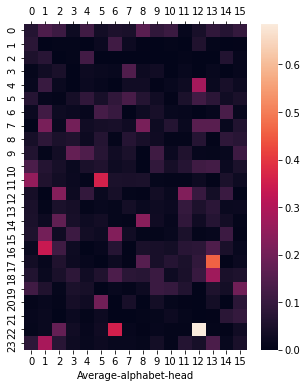

In [271]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-alphabet-head')

<AxesSubplot:>

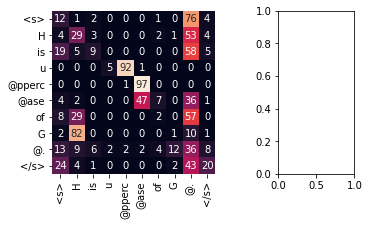

In [272]:
i = 6
layer, head = 22, 12
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)

In [334]:
# 数字与其英文单词对应
template = ["The Arabic numeral * _ is * = in English."]
template1 = ["The Arabic number * _ is * = in English."]
nums = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
alpha = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

pairs0 = []
texts0 = []
# 词对
for i in range(9):
    pair = [nums[i], alpha[i]]
    #air = [alpha[i], nums[i]]
    pairs0.append(pair)
#print(pairs)
# 替换
for text in template1:
    for idx in pairs0:
        example = text.replace('_', idx[0]).replace('=', idx[1])
        texts0.append(example)
        
# 算head注意力值
# 选取样例范围
texts = texts0#[-6: ] 
all_attn_probs, idx_pairs, tokenses = [], [], []
for text in texts:
    if mask_token is not None:
        text = text.replace(' _ ', ' %s ' % mask_token)
    tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(text, add_special_tokens=True))
    tokens = ['*' if token in ['*', 'Ġ*'] else token for token in tokens]
    marker = '*'
    if marker in tokens:
        assert tokens.count(marker) == 2, str(tokens)
        p, h = [i for i, token in enumerate(tokens) if token == marker]
        tokens = [token for token in tokens if token != marker]
        h -= 1
        print(tokens[p], tokens[h])
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    pred_idx = [i for i, token in enumerate(tokens) if token == mask_token] if mask_token is not None else [-1]
    tokens = ['@' + token if not token.startswith('Ġ') and token not in ['<s>', '</s>', '<mask>'] else token.replace('Ġ', '') 
              for token in tokens] 
    print(tokens)
    
    input_ids = torch.tensor([token_ids])
    with torch.no_grad():
        outputs = model(input_ids, output_attentions=True)
        logits, attns = outputs.logits, outputs.attentions
        probs = F.softmax(logits, dim=-1)

#     attn_scores, attn_probs = zip(*attns)
    attn_probs = attns
#     attn_scores = torch.cat(attn_scores, dim=0), 
    attn_probs = torch.cat(attn_probs, dim=0)
    all_attn_probs.append(attn_probs)
    idx_pairs.append((p, h))
    tokenses.append(tokens)
    #print("===============================")
   # print(tokenses)
    #print(idx_pairs)
    #print(attn_probs[0, 0, 1, 1])
   # print(attn_probs[:, :, h, p])

# 求head对于特定词对的attention值的平均值
attn_sum = np.zeros((24, 16),dtype='float32')
i = 0
for attn_one, (p, h) in zip(all_attn_probs, idx_pairs):    
    attn_every = np.array(attn_one[:, :, h, p])
   #求和
    attn_sum += attn_every
   # 记录总共有多少句子来求平均
    i = i+1

#求平均
attn_average = attn_sum/i 
#rint(attn_average[:2])
average = attn_average.tolist()

Ġ0 Ġzero
['<s>', '@The', 'Arabic', 'number', '0', 'is', 'zero', 'in', 'English', '@.', '</s>']
Ġ1 Ġone
['<s>', '@The', 'Arabic', 'number', '1', 'is', 'one', 'in', 'English', '@.', '</s>']
Ġ2 Ġtwo
['<s>', '@The', 'Arabic', 'number', '2', 'is', 'two', 'in', 'English', '@.', '</s>']
Ġ3 Ġthree
['<s>', '@The', 'Arabic', 'number', '3', 'is', 'three', 'in', 'English', '@.', '</s>']
Ġ4 Ġfour
['<s>', '@The', 'Arabic', 'number', '4', 'is', 'four', 'in', 'English', '@.', '</s>']
Ġ5 Ġfive
['<s>', '@The', 'Arabic', 'number', '5', 'is', 'five', 'in', 'English', '@.', '</s>']
Ġ6 Ġsix
['<s>', '@The', 'Arabic', 'number', '6', 'is', 'six', 'in', 'English', '@.', '</s>']
Ġ7 Ġseven
['<s>', '@The', 'Arabic', 'number', '7', 'is', 'seven', 'in', 'English', '@.', '</s>']
Ġ8 Ġeight
['<s>', '@The', 'Arabic', 'number', '8', 'is', 'eight', 'in', 'English', '@.', '</s>']
168 168
2


Text(0.5, 33.0, 'Average-alphabet-head')

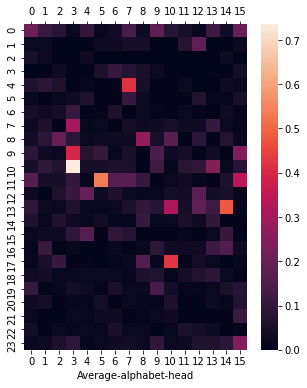

In [298]:
# 算平均后的head图
fig = plt.subplots(1,1,sharey=False, figsize=(5 , 6))
ax = sns.heatmap(attn_average)
ax.tick_params(top=True, labeltop=True)
ax.set_xlabel('Average-alphabet-head')

In [290]:
fig

(<Figure size 360x432 with 2 Axes>,
 <AxesSubplot:xlabel='Average-alphabet-head'>)

<AxesSubplot:>

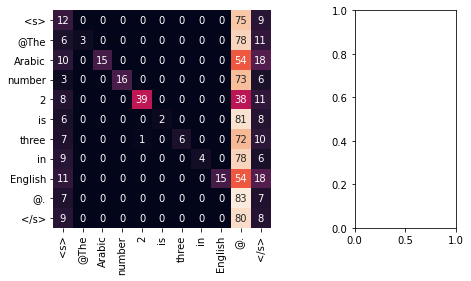

In [285]:
i = 2
layer, head = 10, 3
attn = all_attn_probs[i][layer, head]
tokens = tokenses[i]
size = round(attn.size(0) / 3)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(size  * 2., size), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap((attn * 100).long(), square=True, cbar=False, annot=True, fmt='d', xticklabels=tokens, yticklabels=tokens, ax=ax0)

In [342]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 394.3 MB 23 kB/s  eta 0:00:011   |█████▏                          | 63.4 MB 1.8 MB/s eta 0:03:03     |█████▎                          | 65.7 MB 1.8 MB/s eta 0:03:02     |██████▏                         | 75.5 MB 482 kB/s eta 0:11:01     |████████▍                       | 103.9 MB 2.1 MB/s eta 0:02:19     |████████████████                | 197.9 MB 51.4 MB/s eta 0:00:04     |█████████████████               | 209.1 MB 533 kB/s eta 0:05:47     |███████████████████▊            | 243.6 MB 539 kB/s eta 0:04:40     |█████████████████████           | 258.4 MB 676 kB/s eta 0:03:21     |██████████████████████          | 271.3 MB 2.2 MB/s eta 0:00:57     |██████████████████████████████▍ | 374.8 MB 724 kB/s eta 0:00:27
     |████████████████████████████████| 3.8 MB 553 kB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 255 kB/s eta 0:00:01
     |██████████████████████

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
    Running setup.py install for wrapt ... done
ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 训练分类器

In [340]:
import tensorflow as tf
import numpy as np
# 普通神经网路还是dnn全连接神经网络还是cnn卷积神经网路？

ModuleNotFoundError: No module named 'tensorflow'

In [343]:
print(len(image),len(label))

183 183


In [363]:
# 单层nn
# 数据处理，处理注意力模式矩阵图，把图片展开成向量，长度是24*16？是否可以直接用atten_average?
#需要分一部分用作训练集，一部分用作测试集
#image, label = 

# labellist为要的类别，用一个序号对应一个类。label = [0, 1, 2, 3]每个元素对应labellist = ['num+1', 'num-1', 'num=', 'upper']
# 可以是标签数据是one-hot向量，分成4类即向量为4维/位，一类占一位、

# 随机打乱数据
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应，seed使用一次就失效了
np.random.shuffle(image)  # shuffle函数可以打乱列表顺序，打乱的规则由seed决定
np.random.seed(116)
np.random.shuffle(label)
#tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前150行，测试集为后33行
x_train = image[:-33]
y_train = label[:-33]
x_test = image[-33:]
y_test = label[-33:]

#x_d = [[],....,[]] # 行数为注意力矩阵图样本数，列数为24*16，可以通过便将矩阵处理为向量，边x_data.append(vector)
#x_data = numpy.array(x_d)
#y_d = [] # 行数为一行，列数为样本数，为x对应的标签
#y_data =  numpy.array(y_d)
labellist = ['num+1', 'num-1', 'num=', 'upper']

# 数据用map转成tensor格式并查看
x_train, y_train, x_test, y_test = map(torch.tensor, (x_train, y_train, x_test, y_test))
n, c = x_train.shape
# x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
#train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
# train_db的遍历需要的循环次数为4，每次遍历是一个（（），（）），第一个括号为32行，n列的特征数据，第二个括号为1行32列的标签
#test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)
# test_db的遍历需要的循环次数为1，每次遍历是一个（（），（）），第一个括号为30行，n列的特征数据，第二个括号为1行30列的标签


tensor([[0.1176, 0.1119, 0.0201,  ..., 0.0120, 0.1906, 0.3553],
        [0.1606, 0.1538, 0.0314,  ..., 0.0077, 0.1969, 0.3468],
        [0.2101, 0.1533, 0.0037,  ..., 0.0137, 0.3575, 0.3391],
        ...,
        [0.1048, 0.0319, 0.2338,  ..., 0.1370, 0.0283, 0.1820],
        [0.1889, 0.0320, 0.1108,  ..., 0.0351, 0.1636, 0.2276],
        [0.2275, 0.0407, 0.0640,  ..., 0.1314, 0.1677, 0.0641]]) tensor([1, 1, 2, 2, 1, 3, 0, 0, 2, 2, 2, 0, 3, 1, 1, 0, 0, 2, 0, 3, 2, 0, 1, 1,
        1, 2, 2, 0, 1, 3, 0, 2, 1, 0, 3, 0, 2, 3, 2, 3, 2, 0, 1, 0, 0, 3, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 2, 2, 0,
        0, 0, 0, 2, 1, 3, 3, 0, 2, 2, 1, 1, 2, 3, 2, 0, 1, 2, 0, 2, 1, 3, 0, 0,
        0, 2, 1, 3, 0, 1, 1, 0, 1, 3, 2, 1, 2, 0, 1, 0, 3, 1, 2, 1, 0, 1, 1, 2,
        2, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 3, 0, 3, 3, 0, 2, 2, 2, 3, 2, 1, 1,
        0, 2, 1, 3, 2, 1])
torch.Size([150, 384])
tensor(0) tensor(3)


In [364]:
# 构建分类模型
from torch import nn
loss_func = F.cross_entropy #分类问题 交叉熵损失函数

def model(xb):
    return xb.mm(weights)+bias

bs = 32   # batch size
xb = x_train[0:bs]  # a mini-batch from x
yb = y_train[0:bs]
weights = torch.randn([384, 4], dtype = torch.float,  requires_grad = True) 
bias = torch.zeros(4, requires_grad=True)  # 偏置参数

print(loss_func(model(xb), yb))

# 定义网络
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(384,128) #隐层1
        self.hidden2 = nn.Linear(128,256) #隐层2
        self.out = nn.Linear(256,4) #输出
    def forward(self,x):
        x = F.relu(self.hidden1(x)) #激活函数 结果传送到relu中 得到第一层处理结果
        x = F.relu(self.hidden2(x)) 
        x = self.out(x)
        return x 

net = Mnist_NN()
print(net)

# 打印定义好名字里的权重weights和偏置项bases/bias
#for name,parameter in net.named_parameters():
    #print(name,parameter,parameter.size())

tensor(2.5731, grad_fn=<NllLossBackward>)
Mnist_NN(
  (hidden1): Linear(in_features=384, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=4, bias=True)
)


In [365]:
# 使用Dataset：将数据封装；Dataset：将数据封装；简化构造数据
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#封装成dataset格式
train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds,batch_size=bs,shuffle=True) #shuffle洗牌

test_ds = TensorDataset(x_test,y_test)
test_dl = DataLoader(test_ds,batch_size=bs*2)

In [355]:
#用dataloader一个batch一个batch的读取数据
def get_data(train_ds,test_ds,bs):
    return(
        DataLoader(train_ds,batch_size=bs,shuffle=True),
        DataLoader(test_ds,batch_size=bs,shuffle=True)
    )

In [366]:
model = Mnist_NN()
# 另一种定义train()和test()
def train_func(training_data):
    
    train_loss = 0
    train_acc = 0
    
    for i, (x, y) in enumerate(training_data):
        y = y.squeeze(1).long()
        optimizer.zero_grad()
        output = model(x.float())
        loss = loss_func(output, y)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        train_acc += (output.argmax(1) == y).sum().item()
        
    return train_loss / len(train_targets), train_acc / len(train_targets)
    
def test_func(testing_data):
    
    loss = 0
    acc = 0
    
    for i, (x, y) in enumerate(testing_data):
        y = y.squeeze(1).long()
        with torch.no_grad():
            output = model(x.float())
            loss = loss_func(output, y)
            loss += loss.item()
            acc += (output.argmax(1) == y).sum().item()

    return loss / len(test_targets), acc / len(test_targets)

In [367]:
# 另一种训练与测试
N_EPOCHS = 2001
import time
best_test_acc = 0
for epoch in range(N_EPOCHS):

    start_time = time.time()
    train_loss, train_acc = train_func(train_dl)
    valid_loss, valid_acc = test_func(test_dl)
    best_test_acc = max(valid_acc, best_test_acc)

    secs = int(time.time() - start_time)
    mins = secs / 60
    secs = secs % 60
    if epoch % 50 == 0:
        print('Epoch: %d' %(epoch + 1), " | time in %d minutes, %d seconds" %(mins, secs))
        print(f'\tLoss: {train_loss:.4f}(train)\t|\tAcc: {train_acc * 100:.1f}%(train)')
        print(f'\tLoss: {valid_loss:.4f}(test)\t|\tAcc: {valid_acc * 100:.1f}%(test)')

print(f'Best Testing Acc: {best_test_acc * 100:.1f}% ')

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [368]:
model

Mnist_NN(
  (hidden1): Linear(in_features=384, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=4, bias=True)
)

In [356]:
# 训练模型

# 定义损失函数
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

# 定义模型、优化器、学习率
from torch import optim
def get_model():
    model = Mnist_NN()
    return model, optim.SGD(model.parameters(), lr=0.001)

# 定义训练函数
import numpy as np
#steps=要迭代多少次
#model模型
#loss_func损失函数
#opt优化器
#train_dl训练数据
#test_dl验证数据
def fit(steps, model, loss_func, opt, train_dl, test_dl): 
    for step in range(steps):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(*[loss_batch(model, loss_func, xb, yb) for xb, yb in test_dl])
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        print('当前step:'+str(step), '验证集损失：'+str(val_loss))

In [362]:
train_dl, test_dl = get_data(train_ds, test_ds, bs)
model, opt = get_model()
fit(1000, model, loss_func, opt, train_dl, test_dl)

当前step:0 验证集损失：1.386324279236071
当前step:1 验证集损失：1.3861095363443547
当前step:2 验证集损失：1.3858982035608003
当前step:3 验证集损失：1.3856833775838215
当前step:4 验证集损失：1.3854736523194746
当前step:5 验证集损失：1.3852632117993904
当前step:6 验证集损失：1.3850568027207346
当前step:7 验证集损失：1.3848410772554802
当前step:8 验证集损失：1.384631583184907
当前step:9 验证集损失：1.3844299388654304
当前step:10 验证集损失：1.3842256719415837
当前step:11 验证集损失：1.384025028257659
当前step:12 验证集损失：1.3838253599224668
当前step:13 验证集损失：1.3836249365951077
当前step:14 验证集损失：1.383426749345028
当前step:15 验证集损失：1.3832267956300215
当前step:16 验证集损失：1.3830259641011555
当前step:17 验证集损失：1.3828325560598662
当前step:18 验证集损失：1.3826272451516353
当前step:19 验证集损失：1.3824375036991003
当前step:20 验证集损失：1.3822393923094778
当前step:21 验证集损失：1.3820418191678596
当前step:22 验证集损失：1.381846370119037
当前step:23 验证集损失：1.381655053658919
当前step:24 验证集损失：1.381456682176301
当前step:25 验证集损失：1.381261843623537
当前step:26 验证集损失：1.3810673807606553
当前step:27 验证集损失：1.380875410455646
当前step:28 验证集损失：1.3806859579953281
当前st

当前step:241 验证集损失：1.3507583647063284
当前step:242 验证集损失：1.3506405967654604
当前step:243 验证集损失：1.3505233309485696
当前step:244 验证集损失：1.3504031318606753
当前step:245 验证集损失：1.350285089377201
当前step:246 验证集损失：1.3501742680867512
当前step:247 验证集损失：1.3500581510139233
当前step:248 验证集损失：1.349940325274612
当前step:249 验证集损失：1.3498266248991995
当前step:250 验证集损失：1.349707220539902
当前step:251 验证集损失：1.349590135343147
当前step:252 验证集损失：1.3494739749214866
当前step:253 验证集损失：1.349354989600904
当前step:254 验证集损失：1.3492369109934026
当前step:255 验证集损失：1.3491178931611958
当前step:256 验证集损失：1.3490024732820916
当前step:257 验证集损失：1.3488871437130552
当前step:258 验证集损失：1.3487695636171284
当前step:259 验证集损失：1.3486497366067134
当前step:260 验证集损失：1.3485334533633608
当前step:261 验证集损失：1.3484187053911614
当前step:262 验证集损失：1.3483026786284014
当前step:263 验证集损失：1.3481858824238633
当前step:264 验证集损失：1.3480669332273079
当前step:265 验证集损失：1.3479515025109956
当前step:266 验证集损失：1.347835746678439
当前step:267 验证集损失：1.34771901549715
当前step:268 验证集损失：1.3476038484862356


当前step:472 验证集损失：1.322105797854337
当前step:473 验证集损失：1.3219591487537732
当前step:474 验证集损失：1.3218105200565222
当前step:475 验证集损失：1.3216637300722527
当前step:476 验证集损失：1.3215138442588574
当前step:477 验证集损失：1.3213626977169153
当前step:478 验证集损失：1.3212137764150447
当前step:479 验证集损失：1.321063290942799
当前step:480 验证集损失：1.320914589997494
当前step:481 验证集损失：1.320763298959443
当前step:482 验证集损失：1.3206159562775583
当前step:483 验证集损失：1.320467446789597
当前step:484 验证集损失：1.3203149311470264
当前step:485 验证集损失：1.3201645432096538
当前step:486 验证集损失：1.3200143756288472
当前step:487 验证集损失：1.3198641141255696
当前step:488 验证集损失：1.3197110674598
当前step:489 验证集损失：1.3195598125457764
当前step:490 验证集损失：1.31941071062377
当前step:491 验证集损失：1.3192578662525525
当前step:492 验证集损失：1.319105899695194
当前step:493 验证集损失：1.3189487493399419
当前step:494 验证集损失：1.3187956629377422
当前step:495 验证集损失：1.3186422767061177
当前step:496 验证集损失：1.3184864882266882
当前step:497 验证集损失：1.3183315594991047
当前step:498 验证集损失：1.3181755470507073
当前step:499 验证集损失：1.318018685687672
当前st

当前step:703 验证集损失：1.2765168637940378
当前step:704 验证集损失：1.2762529091401533
当前step:705 验证集损失：1.2759854251688176
当前step:706 验证集损失：1.2757176160812378
当前step:707 验证集损失：1.2754493409937078
当前step:708 验证集损失：1.2751830346656567
当前step:709 验证集损失：1.2749136939193264
当前step:710 验证集损失：1.2746411236849697
当前step:711 验证集损失：1.2743704030008027
当前step:712 验证集损失：1.2740990934949932
当前step:713 验证集损失：1.2738249446406509
当前step:714 验证集损失：1.2735516483133489
当前step:715 验证集损失：1.2732763507149436
当前step:716 验证集损失：1.273002646186135
当前step:717 验证集损失：1.2727271246187615
当前step:718 验证集损失：1.2724533370046904
当前step:719 验证集损失：1.2721767064296838
当前step:720 验证集损失：1.2718978506146055
当前step:721 验证集损失：1.2716187527685454
当前step:722 验证集损失：1.2713383147210786
当前step:723 验证集损失：1.2710565436970105
当前step:724 验证集损失：1.2707796891530354
当前step:725 验证集损失：1.2704967766097097
当前step:726 验证集损失：1.2702127586711536
当前step:727 验证集损失：1.2699339353676997
当前step:728 验证集损失：1.2696509903127497
当前step:729 验证集损失：1.2693652817697236
当前step:730 验证集损失：1.2690793962

当前step:936 验证集损失：1.1911985332315618
当前step:937 验证集损失：1.190719333561984
当前step:938 验证集损失：1.1902431719230884
当前step:939 验证集损失：1.1897711645473132
当前step:940 验证集损失：1.1892859357776064
当前step:941 验证集损失：1.188805569301952
当前step:942 验证集损失：1.1883236783923525
当前step:943 验证集损失：1.187842455777255
当前step:944 验证集损失：1.1873570319378015
当前step:945 验证集损失：1.186875556454514
当前step:946 验证集损失：1.1863927696690415
当前step:947 验证集损失：1.1859093434882886
当前step:948 验证集损失：1.1854206468119766
当前step:949 验证集损失：1.184938568057436
当前step:950 验证集损失：1.1844528263265437
当前step:951 验证集损失：1.183965872634541
当前step:952 验证集损失：1.1834780844775112
当前step:953 验证集损失：1.182983069708853
当前step:954 验证集损失：1.1824885642889775
当前step:955 验证集损失：1.1819946585279522
当前step:956 验证集损失：1.1814964070464626
当前step:957 验证集损失：1.1810058246959338
当前step:958 验证集损失：1.1805111205939092
当前step:959 验证集损失：1.1800095529267283
当前step:960 验证集损失：1.1795122731815686
当前step:961 验证集损失：1.1790115056615886
当前step:962 验证集损失：1.1785148237690781
当前step:963 验证集损失：1.1780158642566565

In [346]:
list1 = ['a', 'b', 'c', 'd']
list2 = [1, 2, 3, 4]
np.random.seed(10)  # 使用相同的seed，保证输入特征和标签一一对应，seed使用一次就失效了
np.random.shuffle(list1)  # shuffle函数可以打乱列表顺序，打乱的规则由seed决定
np.random.seed(10)
np.random.shuffle(list2)
print(list1)
print(list2)

['c', 'a', 'd', 'b']
[3, 1, 4, 2]


In [ ]:
# 定义模型
# 生成神经网络的参数，个输入特征故，输入层为个输入节点；因为4分类，故输出层为4个神经元
# 用tf.Variable()标记参数可训练
# 需要先初始化w和b的值，w的维度是[图片向量长度，分的类数（每一位对应不同类）]，b的形状是类的数量，可直接加到输出上 
x = tf.placeholder("float", [None, 784])

W = tf.Variable(tf.zeros([,4]))
b = tf.Variable(tf.zeros([4]))
# softmax会进行归一化，且将数据分为5维，每位为对应类的概率，其和为1
y = tf.nn.softmax(tf.matmul(x,W) + b)

# 训练模型前，首先需要定义一个指标来评估这个模型是好的.通常定义指标来表示一个模型是坏的，这个指标称为成本 (cost) 或损失 (loss)，然后尽量最小化这个指标。


In [ ]:
# 使用cnn
# 处理数据

In [ ]:
# 产生用于训练的批次


In [ ]:
# 定义训练的模型

In [ ]:
# 训练